<a href="https://colab.research.google.com/github/mkirby1995/DS-Unit-2-Sprint-3-Classification-Validation/blob/master/LS_DS_231_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Logistic Regression

Logistic regression is the baseline for classification models, as well as a handy way to predict probabilities (since those too live in the unit interval). While relatively simple, it is also the foundation for more sophisticated classification techniques such as neural networks (many of which can effectively be thought of as networks of logistic models).

## Lecture - Where Linear goes Wrong
### Return of the Titanic 🚢

You've likely already explored the rich dataset that is the Titanic - let's use regression and try to predict survival with it. The data is [available from Kaggle](https://www.kaggle.com/c/titanic/data), so we'll also play a bit with [the Kaggle API](https://github.com/Kaggle/kaggle-api).

### Get data, option 1: Kaggle API

#### Sign up for Kaggle and get an API token
1. [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. 
2. [Follow these instructions](https://github.com/Kaggle/kaggle-api#api-credentials) to create a Kaggle “API Token” and download your `kaggle.json` file. If you are using Anaconda, put the file in the directory specified in the instructions.

_This will enable you to download data directly from Kaggle. If you run into problems, don’t worry — I’ll give you an easy alternative way to download today’s data, so you can still follow along with the lecture hands-on. And then we’ll help you through the Kaggle process after the lecture._

#### Put `kaggle.json` in the correct location

- ***If you're using Anaconda,*** put the file in the directory specified in the [instructions](https://github.com/Kaggle/kaggle-api#api-credentials).

- ***If you're using Google Colab,*** upload the file to your Google Drive, and run this cell:

In [0]:
from google.colab import drive
drive.mount('/content/drive')
%env KAGGLE_CONFIG_DIR=/content/drive/My Drive/

KeyboardInterrupt: ignored

#### Install the Kaggle API package and use it to get the data

You also have to join the Titanic competition to have access to the data

In [0]:
!pip install kaggle

In [0]:
!kaggle competitions download -c titanic

### Get data, option 2: Download from the competition page
1. [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. 
2. [Go to the Titanic competition page](https://www.kaggle.com/c/titanic) to download the [data](https://www.kaggle.com/c/titanic/data).

### Get data, option 3: Use Seaborn

```
import seaborn as sns
train = sns.load_dataset('titanic')
```

But Seaborn's version of the Titanic dataset is not identical to Kaggle's version, as we'll see during this lesson!

### Read data

In [0]:
import pandas as pd
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
train.shape, test.shape

In [0]:
train.head()

In [0]:
test.head()

In [0]:
train.isnull().sum()

In [0]:
test.isnull().sum()

### How would we try to do this with linear regression?

https://scikit-learn.org/stable/modules/impute.html

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

features = ['Pclass', 'Age', 'Fare']
target = 'Survived'

X_train = train[features]
Y_train = train[target]
X_test = test[features]

imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

lin_reg = LinearRegression()

lin_reg.fit(X_train_imputed, Y_train)

In [0]:
import numpy as np
test_case = np.array([[1, 5, 500]]) #Rich 5 yr old in first class
lin_reg.predict(test_case)

super good survival chance 119%

### How would we do this with Logistic Regression?

In [0]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train_imputed, Y_train)
print(log_reg.predict(test_case))
print(log_reg.predict_proba(test_case))

In [0]:
log_reg.predict(X_test_imputed)

### How accurate is the Logistic Regression?

### What's the math for the Logistic Regression?

https://en.wikipedia.org/wiki/Logistic_function

https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study

## Feature Engineering

Get the [Category Encoder](http://contrib.scikit-learn.org/categorical-encoding/) library

If you're running on Google Colab:

```
!pip install category_encoders
```

If you're running locally with Anaconda:

```
!conda install -c conda-forge category_encoders
```

## Assignment: real-world classification

We're going to check out a larger dataset - the [FMA Free Music Archive data](https://github.com/mdeff/fma). It has a selection of CSVs with metadata and calculated audio features that you can load and try to use to classify genre of tracks. To get you started:

### Get and unzip the data

#### Google Colab

In [4]:
!wget https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
!unzip fma_metadata.zip

--2019-05-07 02:26:23--  https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
Resolving os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)... 86.119.28.13, 2001:620:5ca1:2ff::ce53
Connecting to os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)|86.119.28.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358412441 (342M) [application/zip]
Saving to: ‘fma_metadata.zip’

fma_metadata.zip    100%[===================>] 341.81M  25.8MB/s    in 14s     

2019-05-07 02:26:43 (24.0 MB/s) - ‘fma_metadata.zip’ saved [358412441/358412441]

Archive:  fma_metadata.zip
 bunzipping: fma_metadata/README.txt  
 bunzipping: fma_metadata/checksums  
 bunzipping: fma_metadata/not_found.pickle  
 bunzipping: fma_metadata/raw_genres.csv  
 bunzipping: fma_metadata/raw_albums.csv  
 bunzipping: fma_metadata/raw_artists.csv  
 bunzipping: fma_metadata/raw_tracks.csv  
 bunzipping: fma_metadata/tracks.csv  
 bunzipping: fma_metadata/genres.csv  
 bunzipping: fma_metadata/raw_echonest.cs

#### Windows
- Download the [zip file](https://os.unil.cloud.switch.ch/fma/fma_metadata.zip)
- You may need to use [7zip](https://www.7-zip.org/download.html) to unzip it


#### Mac
- Download the [zip file](https://os.unil.cloud.switch.ch/fma/fma_metadata.zip)
- You may need to use [p7zip](https://superuser.com/a/626731) to unzip it

### Look at first 3 lines of raw file

In [5]:
!head -n 4 fma_metadata/tracks.csv

,album,album,album,album,album,album,album,album,album,album,album,album,album,artist,artist,artist,artist,artist,artist,artist,artist,artist,artist,artist,artist,artist,artist,artist,artist,artist,set,set,track,track,track,track,track,track,track,track,track,track,track,track,track,track,track,track,track,track,track,track
,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page,split,subset,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,,4,1,<p></p>,6073,,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,,,"<p>A 

### Read with pandas
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [0]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [0]:
tracks = pd.read_csv('fma_metadata/tracks.csv', header=[0,1], index_col=0)

In [9]:
tracks.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                        ...       track                         \
         producer tags  ... information interest language_code   
track_id                ...                                      
2             NaN   []  ...         NaN     4656            en   
3             NaN   []  ...         NaN     1470            en   
5             NaN   []  ...         NaN     1933            en   
10            NaN   []  ...         NaN    54881            en   
20            NaN   []  ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [10]:
tracks.shape

(106574, 52)



---



####Create Df for Artist Album and Track

In [0]:
tracks['album', 'track_genre'] = tracks['track', 'genre_top']
tracks['artist', 'track_genre'] = tracks['track', 'genre_top']


In [0]:
album_df = tracks['album']
artist_df = tracks['artist']
track_df = tracks['track']



---



### Fit Logistic Regression!

####Clean and Concatenate dataframes into one large dataframe

#####Clean album_df

In [0]:
album_df = album_df.drop(columns=['information',
                                  'engineer',
                                  'producer',
                                  'tags',
                                  'type',
                                  'date_created',
                                  'date_released',
                                  'title'])

In [0]:
album_df = album_df.rename(columns={'comments': 'album_comments',
                                   'favorites': 'album_favorites',
                                   'id': 'album_id',
                                   'listens': 'album_listens',
                                   'tracks': 'album_track_number'})



---



#####Clean artist_df

In [0]:
art_col_drop = []

for _ in range(len(artist_df.dtypes)):
  #print(artist_df.dtypes[_])
  if artist_df.dtypes[_] == object:
    art_col_drop.append(artist_df.columns[_])

In [0]:
artist_df = artist_df.drop(columns=art_col_drop)
artist_df = artist_df.drop(columns=['latitude', 'longitude'])

In [0]:
artist_df = artist_df.rename(columns={'comments': 'artist_comments',
                                      'favorites': 'artist_favorites',
                                      'id': 'artist_id'})



---



#####clean track_df

In [0]:
track_df = track_df.drop(columns=['composer',
                                  'date_created',
                                  'date_recorded',
                                  'genres',
                                  'genres_all',
                                  'information',
                                  'language_code',
                                  'license',
                                  'lyricist',
                                  'publisher',
                                  'tags',
                                  'title'])

In [0]:
track_df = track_df.rename(columns={'bit_rate':'track_bit_rate',
                                    'comments':'track_comments',
                                    'duration':'track_duration',
                                    'favorites':'track_favorites',
                                    'genre_top':'track_genre',
                                    'interest':'track_interest',
                                    'listens':'track_listens',
                                    'number':'track_number',})



---



#####Concatenate Dataframes

In [0]:
df = pd.concat([album_df, artist_df, track_df], axis=0, sort=False)

In [21]:
df.describe()

,album_comments,album_favorites,album_id,album_listens,album_track_number,artist_comments,artist_favorites,artist_id,track_bit_rate,track_comments,track_duration,track_favorites,track_interest,track_listens,track_number
count,106574.000000,106574.000000,106574.000000,1.065740e+05,106574.000000,106574.000000,106574.000000,106574.000000,106574.000000,106574.000000,106574.000000,106574.000000,1.065740e+05,106574.000000,106574.000000
mean,0.394946,1.286927,12826.933914,3.212031e+04,19.721452,1.894702,30.041915,12036.770404,263274.695048,0.031621,277.849100,3.182521,3.541310e+03,2329.353548,8.260945
std,2.268915,3.133035,6290.261805,1.478532e+05,39.943673,6.297679,100.511408,6881.420867,67623.443584,0.321993,305.518553,13.513820,1.901743e+04,8028.070647,15.243271
min,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,7793.000000,3.361000e+03,7.000000,0.000000,1.000000,6443.000000,192000.000000,0.000000,149.000000,0.000000,5.990000e+02,292.000000,2.000000
50%,0.000000,0.000000,13374.000000,8.982000e+03,11.000000,0.000000,5.000000,12029.500000,299914.000000,0.000000,216.000000,1.000000,1.314000e+03,764.000000,5.000000
75%,0.000000,1.000000,18203.000000,2.363500e+04,17.000000,1.000000,16.000000,18011.000000,320000.000000,0.000000,305.000000,3.000000,3.059000e+03,2018.000000,9.000000
max,53.000000,61.000000,22940.000000,3.564243e+06,652.000000,79.000000,963.000000,24357.000000,448000.000000,37.000000,18350.000000,1482.000000,3.293557e+06,543252.000000,255.000000


In [22]:
df.describe(exclude='number')

,track_genre
count,99196
unique,16
top,Rock
freq,28364




---



#####Encode `genre_top`

In [0]:
subset = df.dropna(subset=['track_genre'])

In [24]:
subset['track_genre'].replace({'Rock':1,
                               'Experimental':2,
                               'Electronic':2,
                               'Hip-Hop':1,
                               'Folk':1,
                               'Pop':2,
                               'Instrumental':3,
                               'International':3,
                               'Classical':3,
                               'Jazz':1,
                               'Old-Time / Historic':3,
                               'Spoken':4,
                               'Country':1,
                               'Soul-RnB':1,
                               'Blues':1,
                               'Easy Listening':4},
                              inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)




---



This dataset is bigger than many you've worked with so far, and while it should fit in Colab, it can take awhile to run. That's part of the challenge!

Your tasks:
- Clean up the variable names in the dataframe
- Use logistic regression to fit a model predicting (primary/top) genre
- Inspect, iterate, and improve your model
- Answer the following questions (written, ~paragraph each):
  - What are the best predictors of genre?
  - What information isn't very useful for predicting genre?
  - What surprised you the most about your results?

*Important caveats*:
- This is going to be difficult data to work with - don't let the perfect be the enemy of the good!
- Be creative in cleaning it up - if the best way you know how to do it is download it locally and edit as a spreadsheet, that's OK!
- If the data size becomes problematic, consider sampling/subsetting, or [downcasting numeric datatypes](https://www.dataquest.io/blog/pandas-big-data/).
- You do not need perfect or complete results - just something plausible that runs, and that supports the reasoning in your written answers

If you find that fitting a model to classify *all* genres isn't very good, it's totally OK to limit to the most frequent genres, or perhaps trying to combine or cluster genres as a preprocessing step. Even then, there will be limits to how good a model can be with just this metadata - if you really want to train an effective genre classifier, you'll have to involve the other data (see stretch goals).

This is real data - there is no "one correct answer", so you can take this in a variety of directions. Just make sure to support your findings, and feel free to share them as well! This is meant to be practice for dealing with other "messy" data, a common task in data science.

#### Model

In [0]:
target = 'track_genre'
features = subset.drop(columns='track_genre').columns.tolist()

In [0]:
features = subset[features]
target = subset[target]

imputer = SimpleImputer()
features_imputed = imputer.fit_transform(features)

In [27]:
log_reg = LogisticRegression(solver='lbfgs', multi_class ='auto', max_iter=1000)
log_reg.fit(features_imputed, target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
log_reg.score(features_imputed, target)

0.4777309568934231

## Resources and stretch goals

- Check out the other .csv files from the FMA dataset, and see if you can join them or otherwise fit interesting models with them
- [Logistic regression from scratch in numpy](https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f) - if you want to dig in a bit more to both the code and math (also takes a gradient descent approach, introducing the logistic loss function)
- Create a visualization to show predictions of your model - ideally show a confidence interval based on error!
- Check out and compare classification models from scikit-learn, such as [SVM](https://scikit-learn.org/stable/modules/svm.html#classification), [decision trees](https://scikit-learn.org/stable/modules/tree.html#classification), and [naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html). The underlying math will vary significantly, but the API (how you write the code) and interpretation will actually be fairly similar.
- Sign up for [Kaggle](https://kaggle.com), and find a competition to try logistic regression with
- (Not logistic regression related) If you enjoyed the assignment, you may want to read up on [music informatics](https://en.wikipedia.org/wiki/Music_informatics), which is how those audio features were actually calculated. The FMA includes the actual raw audio, so (while this is more of a longterm project than a stretch goal, and won't fit in Colab) if you'd like you can check those out and see what sort of deeper analysis you can do.

###Visualization

In [0]:
feature_list = [features['album_comments'],
                features['album_favorites'],
                features['album_id'],
                features['album_listens'],
                features['album_track_number'],
                features['artist_comments'],
                features['artist_favorites'],
                features['artist_id'],
                features['track_bit_rate'],
                features['track_comments'],
                features['track_duration'],
                features['track_favorites'],
                features['track_interest'],
                features['track_listens'],
                features['track_number']]

In [0]:
features['total'] = sum(feature_list)

In [30]:
log_reg.predict(features_imputed)

array([2, 2, 2, ..., 1, 2, 1])

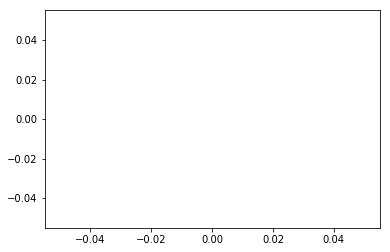

In [44]:
plt.scatter(features['total'], log_reg.predict(features_imputed));